In [1]:
import pandas as pd

In [2]:
movies=pd.read_csv('/content/movies.csv')
ratings=pd.read_csv('/content/ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
final_data=ratings.pivot(index='movieId',columns='userId',values='rating')
final_data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
final_data.fillna(0,inplace=True)
final_data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
no_of_user_voted=ratings.groupby('movieId')['rating'].agg('count')
no_of_user_voted.head()

,rating
movieId,
1,215
2,110
3,52
4,7
5,49


In [8]:
no_of_movies_voted=ratings.groupby('userId')['rating'].agg('count')
no_of_movies_voted.head()

,rating
userId,
1,232
2,29
3,39
4,216
5,44


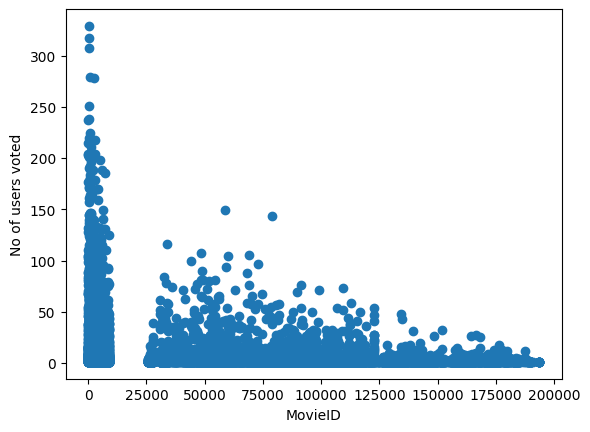

In [13]:
import matplotlib.pyplot as plt

plt.scatter(no_of_user_voted.index,no_of_user_voted)
plt.xlabel('MovieID')
plt.ylabel('No of users voted')
plt.show()


In [15]:
no_of_user_voted[no_of_user_voted>10].index

Index([     1,      2,      3,      5,      6,      7,      9,     10,     11,
           12,
       ...
       159093, 164179, 166528, 168250, 168252, 174055, 176371, 177765, 179819,
       187593],
      dtype='int64', name='movieId', length=2121)

In [16]:
final_dataset = final_data.loc[no_of_user_voted[no_of_user_voted>10].index,:]
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
final_dataset = final_dataset.loc[:,no_of_movies_voted[no_of_movies_voted>30].index]
final_dataset

userId,1,3,4,5,6,7,8,9,10,11,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
import numpy as np

sample = np.array([[0,0,2,0],[0,1,0,0],[0,0,0,4]])
print(sample)
sparsity = 1.0 - (np.count_nonzero(sample) / float(sample.size))
print(sparsity)



from scipy.sparse import csr_matrix

csr_sample = csr_matrix(sample)
print(csr_sample)      #(row, column) → value

[[0 0 2 0]
 [0 1 0 0]
 [0 0 0 4]]
0.75
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (3, 4)>
  Coords	Values
  (0, 2)	2
  (1, 1)	1
  (2, 3)	4


In [21]:
csr_dataset = csr_matrix(final_dataset.values)
print(csr_dataset)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 77167 stored elements and shape (2121, 498)>
  Coords	Values
  (0, 0)	4.0
  (0, 3)	4.0
  (0, 5)	4.5
  (0, 13)	2.5
  (0, 15)	4.5
  (0, 16)	3.5
  (0, 17)	4.0
  (0, 19)	3.5
  (0, 23)	3.0
  (0, 27)	5.0
  (0, 28)	3.0
  (0, 29)	3.0
  (0, 34)	5.0
  (0, 37)	5.0
  (0, 38)	3.0
  (0, 39)	4.0
  (0, 40)	5.0
  (0, 43)	3.0
  (0, 46)	3.0
  (0, 48)	5.0
  (0, 53)	5.0
  (0, 54)	4.0
  (0, 56)	4.0
  (0, 58)	2.5
  (0, 61)	5.0
  :	:
  (2118, 461)	1.5
  (2118, 475)	4.0
  (2118, 488)	4.5
  (2119, 52)	3.5
  (2119, 84)	3.0
  (2119, 131)	0.5
  (2119, 174)	4.5
  (2119, 207)	4.5
  (2119, 314)	0.5
  (2119, 341)	4.5
  (2119, 424)	2.0
  (2119, 461)	2.0
  (2119, 475)	5.0
  (2119, 484)	3.5
  (2120, 52)	4.0
  (2120, 84)	5.0
  (2120, 193)	2.5
  (2120, 206)	4.5
  (2120, 207)	5.0
  (2120, 250)	5.0
  (2120, 272)	4.0
  (2120, 277)	1.0
  (2120, 314)	3.0
  (2120, 424)	3.5
  (2120, 475)	4.0


In [22]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=20)
knn.fit(csr_dataset)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [23]:
final_dataset.reset_index(inplace=True)
final_dataset.head()

userId,movieId,1,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
0,1,4.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,2,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
2,3,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0


In [60]:
def get_movie_recommendation(movie_name,n_movies_to_recommend = 5):

    movie_list = movies[movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_dataset[movie_idx],n_neighbors=n_movies_to_recommend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[1:]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_recommend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [61]:
"""
Summary of What the Function Does:
1.Finds the movieId of the input movie.
2.Locates it in final_dataset to get its row index.
3.Uses KNN to find similar movies (closest neighbors).
4.Sorts the recommendations by distance (most similar first).
5.Finds the titles of recommended movies using movies DataFrame.
6.Returns the recommendations as a DataFrame.
"""

'\nSummary of What the Function Does:\n1.Finds the movieId of the input movie.\n2.Locates it in final_dataset to get its row index.\n3.Uses KNN to find similar movies (closest neighbors).\n4.Sorts the recommendations by distance (most similar first).\n5.Finds the titles of recommended movies using movies DataFrame.\n6.Returns the recommendations as a DataFrame.\n'

In [71]:
get_movie_recommendation('Heat')

,Title,Distance
1,"Rock, The (1996)",0.468748
2,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),0.483095
3,Léon: The Professional (a.k.a. The Professiona...,0.486903
4,Casino (1995),0.493537
5,"Fugitive, The (1993)",0.498927


In [63]:

import pickle

In [64]:
with open("trained_model.sav","wb") as f:
  pickle.dump(knn,f)

In [65]:
with open("trained_model.sav","rb") as f:
  loaded_model=pickle.load(f)

In [66]:
with open("final_dataset.sav","wb") as f:
  pickle.dump(final_dataset,f)

In [67]:
with open("final_dataset.sav","rb") as f:
  loaded_model=pickle.load(f)

In [69]:
with open("csr_dataset.sav","wb") as f:
  pickle.dump(csr_dataset,f)

In [70]:
with open("csr_dataset.sav","rb") as f:
  loaded_model=pickle.load(f)